In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/distan_lat43.302lon-8.377p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M              74.09%
BCFG            7.01%
FG              3.61%
-RA             2.10%
BR              1.55%
RA              1.21%
-RA BCFG        0.99%
RA BCFG         0.67%
BCFG -RA        0.66%
-RA BR          0.58%
RA FG           0.56%
-RA FG          0.56%
RA BR           0.55%
BCFG RA         0.50%
SHRA            0.42%
-DZ             0.34%
VCFG            0.33%
FG DZ           0.30%
FG -RA          0.29%
BCFG -DZ        0.22%
DZ              0.21%
FG RA           0.19%
-DZ FG          0.19%
FG -DZ          0.17%
DZ BCFG         0.16%
+RA FG          0.16%
DZ FG           0.15%
BCFG DZ         0.15%
DZ BR           0.13%
-DZ BCFG        0.13%
-RADZ BCFG      0.13%
-DZ BR          0.13%
+RA BCFG        0.10%
-RADZ           0.10%
+DZ FG          0.09%
-SHRA           0.09%
-RADZ BR        0.08%
+SHRA           0.07%
+RA BR          0.07%
BR RA           0.07%
+RA             0.07%
TS              0.07%
BR -DZ          0.06%
-RADZ FG        0.05%
FG -RADZ        0.05%
BR -RA    

In [4]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2020-06-26 04:00:00         M  No RA/DZ
2019-02-07 17:30:00         M  No RA/DZ
2020-02-03 15:30:00         M  No RA/DZ
2019-08-05 06:00:00        FG  No RA/DZ
2020-03-01 03:00:00     RA FG     RA/DZ
2020-09-14 16:00:00         M  No RA/DZ
2020-10-31 17:30:00     FG DZ     RA/DZ
2020-11-28 06:00:00      BCFG  No RA/DZ
2020-03-31 17:30:00         M  No RA/DZ
2019-08-18 09:30:00      BCFG  No RA/DZ
2020-09-26 15:00:00    +DZ FG     RA/DZ
2019-01-19 16:30:00    -RA FG     RA/DZ
2019-11-15 12:30:00         M  No RA/DZ
2018-10-13 04:00:00         M  No RA/DZ
2020-02-04 05:00:00      BCFG  No RA/DZ
2020-03-05 20:00:00        RA     RA/DZ
2019-03-30 17:00:00         M  No RA/DZ
2019-01-21 13:00:00         M  No RA/DZ
2020-03-24 07:00:00         M  No RA/DZ
2018-10-17 22:30:00        BR  No RA/DZ
2019-03-12 17:00:00    -RA BR     RA/DZ
2018-12-11 15:30:00         M  No RA/DZ
2020-02-07 05:30:00         M  No RA/DZ


No RA/DZ    87%
RA/DZ       13%
Name: prec_l, dtype: object

**Load model**

In [5]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,215.747849,0.0,902.306519,5.105255,13.569287,102718.562500,283.712128,0.804692,24051.365234,14.114291,...,0.000000,-0.000477,0.20000,0.000000,0.000000,0.200000,5563.714844,1548.354980,248.946930,273.993866
2018-01-01 02:00:00,215.917984,0.0,914.343018,5.875232,14.852463,102704.343750,284.151947,0.809324,24039.359375,16.504606,...,3.170000,-34.650459,0.20000,0.000000,0.000000,0.200000,5569.226074,1547.240967,249.484375,273.890198
2018-01-01 03:00:00,223.666367,0.0,940.227722,5.960269,14.331568,102696.648438,284.475311,0.807002,24040.320312,17.431562,...,17.260000,-24.117239,0.30000,0.101562,0.000000,0.300000,5577.497070,1547.338013,249.928879,273.821869
2018-01-01 04:00:00,228.431320,0.0,956.362671,6.237044,15.082509,102694.281250,284.740265,0.815113,24042.085938,17.804031,...,30.129999,-19.603157,0.30000,0.429688,0.000000,0.429688,5584.778809,1548.901001,250.126190,273.762177
2018-01-01 05:00:00,233.394775,0.0,1000.156311,6.957641,15.846083,102686.031250,285.119202,0.827759,24040.648438,18.838913,...,50.369999,-10.988547,0.20000,0.000000,0.000000,0.200000,5587.893066,1549.415039,250.114441,274.289764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,196.194504,0.0,1728.410522,6.787476,15.680066,101285.656250,286.803375,0.799586,24039.525391,24.996758,...,0.000000,0.000188,0.30000,0.000000,0.328125,0.328125,5544.549805,1437.326050,255.119003,278.081055
2022-12-31 20:00:00,196.235443,0.0,1765.730835,7.008511,15.354391,101351.742188,286.676361,0.757733,24039.185547,30.592403,...,0.000000,0.000438,0.20000,0.000000,0.218750,0.218750,5547.923828,1442.520996,254.816254,278.311188
2022-12-31 21:00:00,191.455536,0.0,1723.741089,7.775247,17.001736,101384.421875,286.187012,0.787016,24044.787109,28.796240,...,0.000000,-0.000937,0.10000,0.000000,0.242188,0.242188,5549.165039,1447.194946,254.677689,278.057617


In [7]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2020-06-24 11:00:00,No RA/DZ,304.210144,0.0,2979.474609,2.940944,3.878670,101698.718750,292.692139,0.808232,24048.974609,...,4.800,-0.001250,0.066843,0.399401,0.000000,0.399401,5750.349121,1510.923340,260.889252,290.490204
2019-02-03 22:00:00,No RA/DZ,202.888153,0.0,1193.680420,3.063934,9.227461,103044.546875,282.424133,0.775928,24129.750000,...,0.000,0.000082,0.000000,0.600000,0.500000,0.600000,5659.461914,1575.853516,255.308243,275.090759
2019-03-16 01:00:00,No RA/DZ,171.306030,0.0,1971.642578,1.854302,3.749696,102399.335938,278.293549,1.000000,24233.902344,...,0.000,0.000021,0.116317,0.000000,0.000000,0.116317,5707.758789,1546.895996,256.364258,285.414368
2018-10-03 05:00:00,No RA/DZ,158.655853,0.0,2668.899902,3.182980,4.792047,102334.031250,286.595367,0.677981,24135.000000,...,0.000,-0.000045,0.000000,0.000000,0.000000,0.000000,5808.832031,1575.148560,262.247559,288.522675
2020-09-05 21:00:00,No RA/DZ,26.917965,0.0,2603.156250,4.215714,10.863072,102462.476562,290.028870,0.926859,24036.216797,...,3.718,-3.887031,0.000000,0.381248,0.000000,0.381248,5808.196777,1565.510742,263.529327,283.522064
2019-12-08 23:00:00,No RA/DZ,233.571594,0.0,1782.015137,3.085844,4.628745,102975.359375,282.317261,0.999342,24230.992188,...,0.000,0.000012,0.000000,0.000000,0.000000,0.000000,5675.943848,1583.052490,252.425308,280.096069
2019-04-13 02:00:00,No RA/DZ,167.043167,0.0,1577.014160,2.845640,4.246072,101953.921875,281.352570,0.881521,24139.111328,...,0.000,0.000050,0.203125,0.000000,0.093750,0.203125,5615.586914,1495.676392,256.701508,279.512177
2019-04-22 21:00:00,RA/DZ,119.976997,0.0,1074.259277,2.582587,3.665329,99437.453125,283.787048,0.901743,24061.970703,...,10.710,-1.930469,0.531250,0.406250,0.468750,0.531250,5341.027832,1279.277954,252.741287,275.798035
2020-12-21 06:00:00,RA/DZ,223.844193,0.0,2363.553955,5.292923,12.702447,102093.757812,288.757507,0.919094,24042.685547,...,0.000,-0.000457,0.300000,0.376491,0.000000,0.376491,5690.831055,1528.418945,259.440430,283.385254


**Scatter plot significant meteorological variables and prec_l**

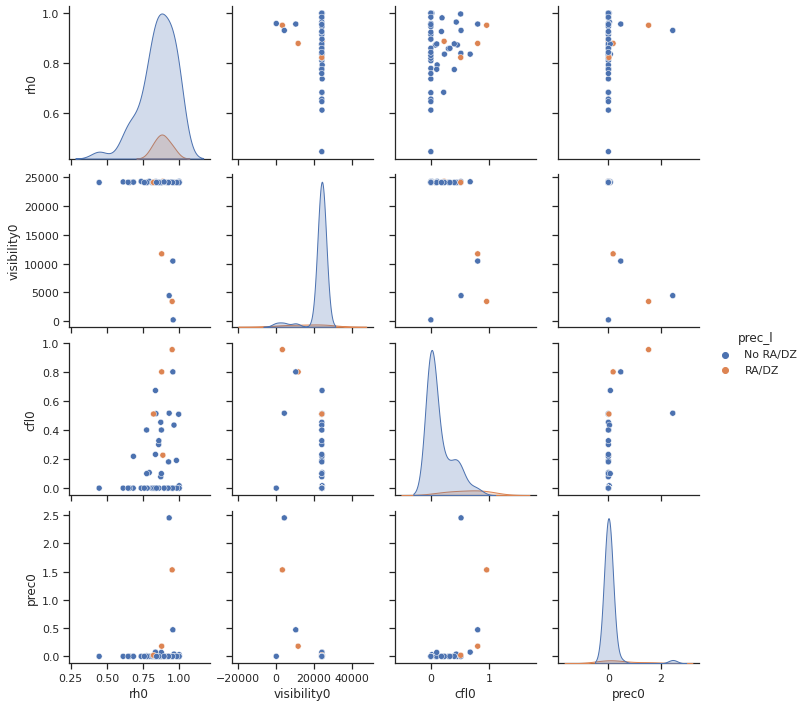

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

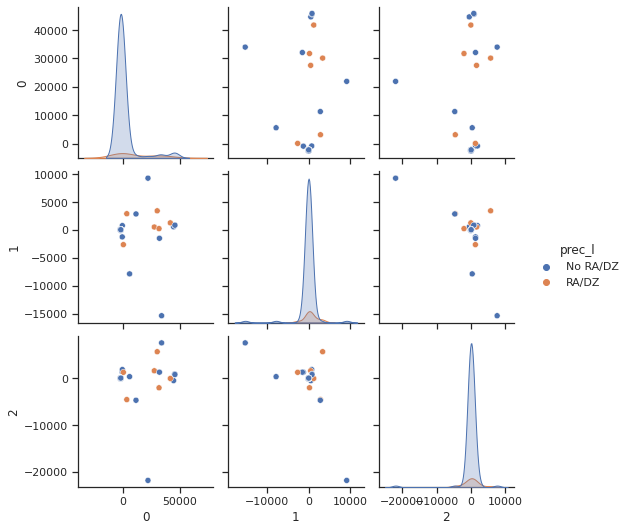

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [10]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     12086   4098  16184
RA/DZ          731   1327   2058
All          12817   5425  18242
Heidke Skill Score: 0.23

Quality report Meteorological model point 0
              precision    recall  f1-score       support
No RA/DZ       0.942966  0.746787  0.833489  16184.000000
RA/DZ          0.244608  0.644801  0.354671   2058.000000
accuracy       0.735281  0.735281  0.735281      0.735281
macro avg      0.593787  0.695794  0.594080  18242.000000
weighted avg   0.864180  0.735281  0.779470  18242.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     12302   3882  16184
RA/DZ          649   1409   2058
All          12951   5291  18242
Heidke Skill Score: 0.26

Quality report Meteorological model point 1
              precision    recall  f1-score       support
No RA/DZ       0.949888  0.760133  0.844483  16184.000000
RA/DZ          0.266301  0.684645  0.3834

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [11]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1751.9259182965375
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [12]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3019    205  3224
RA/DZ          137    288   425
All           3156    493  3649
Heidke Skill Score: 0.57

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.956591  0.936414  0.946395  3224.000000
RA/DZ          0.584178  0.677647  0.627451   425.000000
accuracy       0.906276  0.906276  0.906276     0.906276
macro avg      0.770385  0.807031  0.786923  3649.000000
weighted avg   0.913216  0.906276  0.909247  3649.000000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3019    196  3215
RA/DZ          180    254   434
All           3199    450  3649
Heidke Skill Score: 0.52

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.943732  0.939036  0.941378  3215.000000
RA/DZ          0.564444 

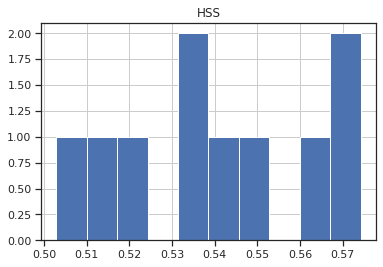

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.23) and at point 1 (0.26). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [14]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.26, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.57 0.52 0.54 0.53 0.5  0.55 0.57 0.57 0.53 0.52]

p_value point 0: 1.6397394351785152e-11

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [21]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [22]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3040    184  3224
RA/DZ          130    295   425
All           3170    479  3649
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.958991  0.942928  0.950891  3224.000000
RA/DZ          0.615866  0.694118  0.652655   425.000000
accuracy       0.913949  0.913949  0.913949     0.913949
macro avg      0.787428  0.818523  0.801773  3649.000000
weighted avg   0.919027  0.913949  0.916156  3649.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3035    180  3215
RA/DZ          165    269   434
All           3200    449  3649
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.948438  0.944012  0.946220  3215.000000
RA/DZ          0.599109  0.

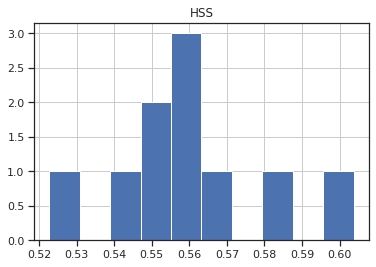

In [24]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [25]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.574 0.516 0.542 0.532 0.503 0.547 0.566 0.568 0.534 0.523]

HSS with time variables: [0.604 0.556 0.57  0.547 0.523 0.556 0.585 0.552 0.546 0.561]

alpha:  0.01

p_value point:  0.002242610252238943

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


****

**Save Machine learning model**

In [26]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LECO_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [27]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3014    210  3224
RA/DZ          105    320   425
All           3119    530  3649
Heidke Skill Score: 0.62

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.966335  0.934864  0.950339  3224.000000
RA/DZ          0.603774  0.752941  0.670157   425.000000
accuracy       0.913675  0.913675  0.913675     0.913675
macro avg      0.785054  0.843902  0.810248  3649.000000
weighted avg   0.924108  0.913675  0.917706  3649.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3044    188  3232
RA/DZ          129    288   417
All           3173    476  3649
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.959344  0.941832  0.950507  3232.000000
RA/DZ          0.605042  0.

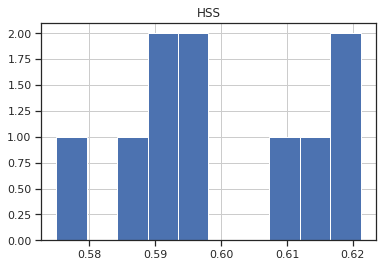

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [29]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.604 0.556 0.57  0.547 0.523 0.556 0.585 0.552 0.546 0.561]

HSS with ExtraTreesClassifier: [0.621 0.596 0.592 0.613 0.589 0.575 0.597 0.621 0.586 0.609]

alpha:  0.01

p_value point:  0.00013962408584902372

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
